<a href="https://colab.research.google.com/github/Bavitayadav8/Bavitayadav8/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

**Splitting the dataset into the Training set and Test set**

In [5]:
X = df[["Age","EstimatedSalary"]]
Y = df["Purchased"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

**Feature Scaling**

In [6]:
ss = StandardScaler()
ss.fit(x_train)
ssx_train = ss.transform(x_train)
ssx_test = ss.transform(x_test)

**Fitting SVM to the Training set**

In [7]:
svm = SVC()
svm.fit(ssx_train,y_train)

SVC()

**Predicting the Test set results**

In [8]:
y_pred = svm.predict(ssx_test)

**Making the Confusion Matrix**

[[76  5]
 [ 2 37]]


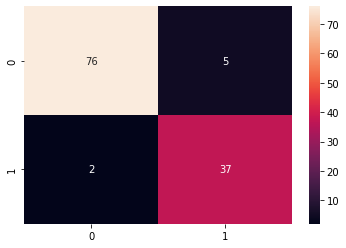

In [9]:
print(confusion_matrix(y_test,y_pred))
confustion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confustion_mat, annot=True)

**Visualising the Training set results**

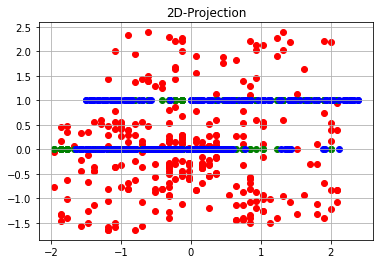

In [10]:
sample1 = ssx_train[:,0]
sample2 = ssx_train[:,1]
plt.scatter(sample1,sample2,c="r")
plt.scatter(sample1,y_train,c="g")
plt.scatter(sample2,y_train,c="b")
plt.title("2D-Projection")
plt.grid()
plt.show()

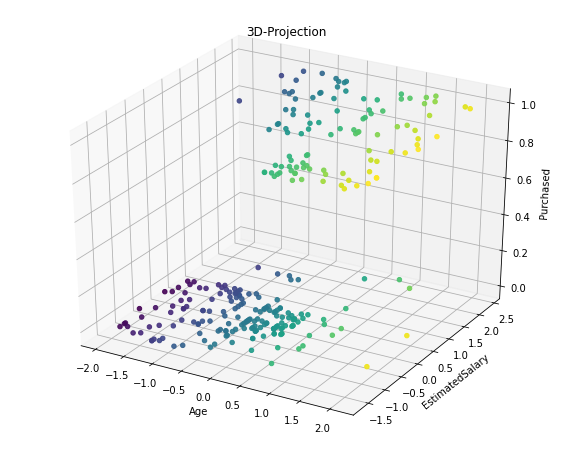

In [11]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
fig = ax.scatter3D(sample1,sample2,y_train,c=sample1,alpha=0.9)
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
ax.set_title("3D-Projection")
plt.show()

**Visualising the Test set results**

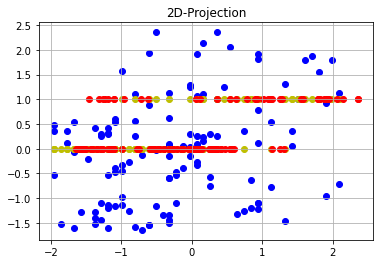

In [12]:
test_sample1 =ssx_test[:,0]
test_sample2 = ssx_test[:,1]
plt.scatter(test_sample1,test_sample2,c="b")
plt.scatter(test_sample1,y_test,c="y")
plt.scatter(test_sample2,y_test,c="r")
plt.title("2D-Projection")
plt.grid()
plt.show()

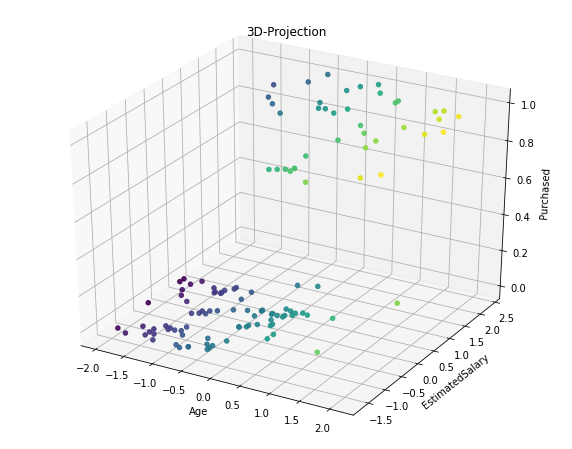

In [13]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
fig = ax.scatter3D(test_sample1,test_sample2,y_test,c=test_sample1,alpha=0.9)
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
ax.set_title("3D-Projection")
plt.show()